In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

# 图像平滑处理

* 均值滤波
* 方框滤波
* 高斯滤波
* 中值滤波
* 双边滤波
* 2D卷积（自定义滤波）

卷积核越大，去噪效果越好，当然花费的计算时间也会越长，同时让图像失真越严重。在实际处理中，要在失真和去噪效果之间取得平衡，选取合适大小的卷积核。

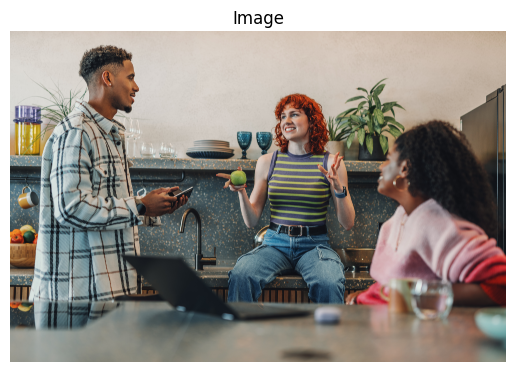

In [4]:
img = cv2.imread('images/samsung.jpg')
show(img)

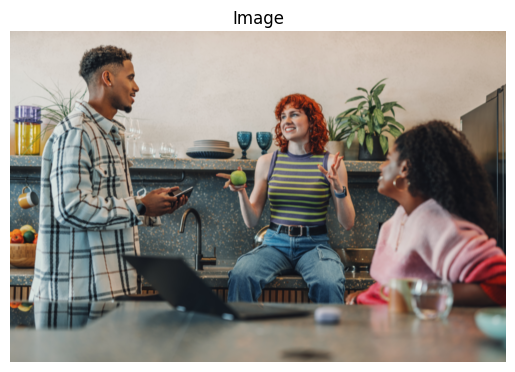

In [5]:
blured = cv2.blur(img, (25, 25))
show(blured)

## 方框滤波

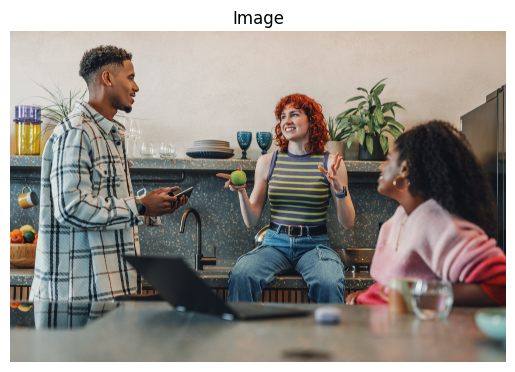

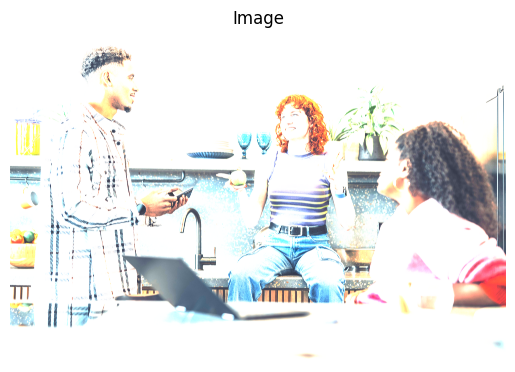

In [6]:
res = cv2.boxFilter(img, 0, (2,2), normalize=True)
show(res)
res = cv2.boxFilter(img, 0, (2,2), normalize=False)
show(res)

## 高斯滤波
在高斯滤波中，会将中心点的权重值加大，远离中心点的权重值减小，在此基础上计算邻域内各个像素值不同权重的和。

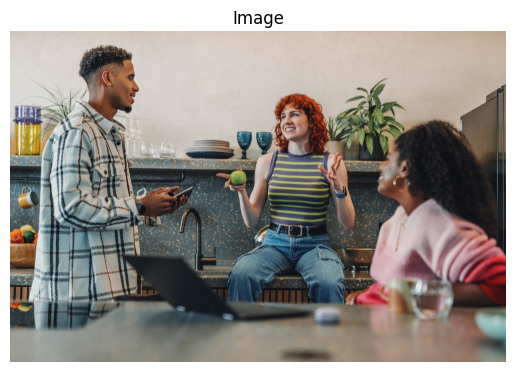

In [7]:
res = cv2.GaussianBlur(img, (25,25), 0, 0)
show(res)

## 双边滤波

双边滤波在计算某一个像素点的新值时，不仅考虑距离信息（距离越远，权重越小），还考虑色彩信息（色彩差别越大，权重越小）。双边滤波综合考虑距离和色彩的权重结果，既能够有效地去除噪声，又能够较好地保护边缘信息。

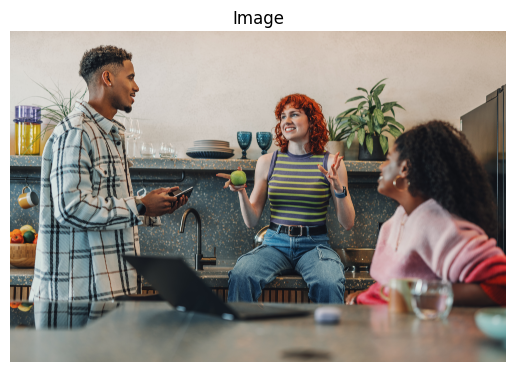

In [8]:
res = cv2.bilateralFilter(img, 9, 75, 75)
show(res)

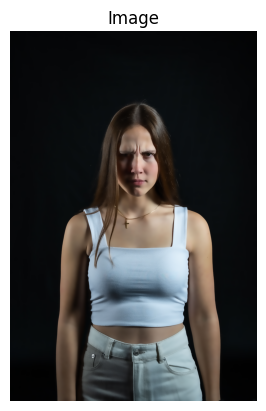

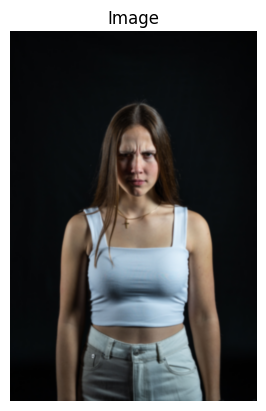

In [9]:
girl = cv2.imread('images/sumila.jpg')
res = cv2.bilateralFilter(girl, 50, 75, 75)
show(res)
res = cv2.GaussianBlur(girl, (45,45), 0, 0)
show(res)

## 自定义卷积核

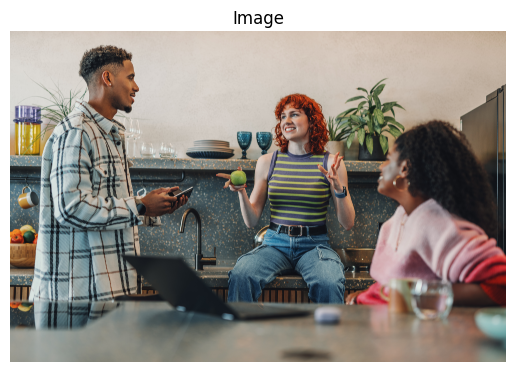

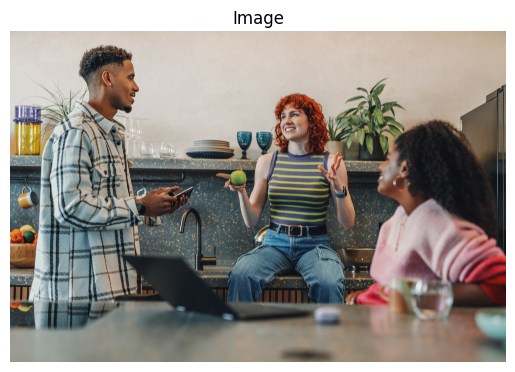

In [10]:
kernel = np.ones((9,9), np.float32)/81
r = cv2.filter2D(img, -1, kernel)
show(img)
show(r)